# 합성곱 신경망의 시각화

합성곱 신경망층이 어떻게 이미지를 처리하는지 보고, 어떠한 가중치들을 사용하는지 시각화 하기.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hg-mldl2/blob/main/08-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [51]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import keras
import tensorflow as tf

keras.utils.set_random_seed(42)
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

In [52]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.keras 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-08-01 14:42:36--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-08-01 14:42:37--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras.2’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.05s   

2025-08-01 14:42:37 (80.7 MB/s) - ‘best-cnn-model.keras.2’ saved [4038273/4038273]



In [53]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [54]:
# layer 들의 순서를 확인할 수 있고 마지막에 Dropout 을 한뒤 Dense 출력층을 확인 가능.

model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [55]:
conv = model.layers[0]
# 필터의 값, / 필터의 절편
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [77]:
conv_weights = conv.weights[0].numpy()
# print(conv_weights)
print(conv_weights.mean(), conv_weights.std())

-0.014383553 0.23351653


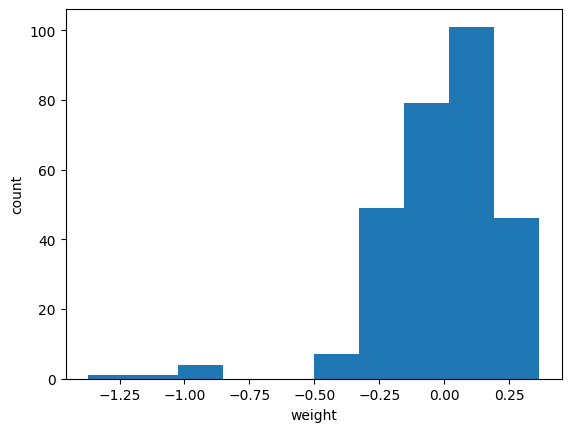

In [57]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

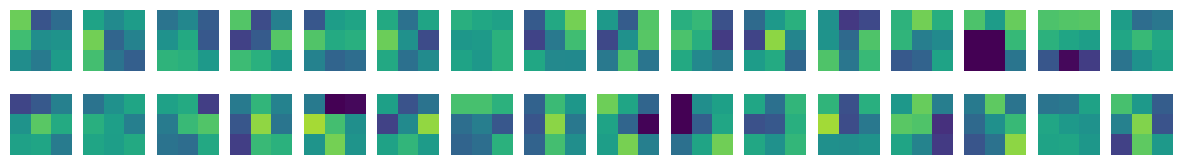

In [79]:
# conv_weights 의 값은 (3,3,1,32) 임.
# => 높이, 너비, 입력채널, 출력채널[필터 수]

# subplots은 그림을 그리는 함수임. 인자값으로 (행, 열, 이미지 크기)
# => 2* 16 으로 그림을 그리고, 가로15인치 세로 2인치 (바탕) 로 그려라.
# 저장된 값 fig / axs 는 각각 배경 / 요소를 의미함.
# fig 는 흰 도화지
# axs 는 각 요소들
# [fig (15 inch x 2 inch)]
#  ├─ axs[0, 0] : 1행 1열 필터
#  ├─ axs[0, 1] : 1행 2열 필터
#  ...
#  └─ axs[1,15] : 2행 16열 필터

fig, axs = plt.subplots(2, 16, figsize=(15,2))
# 0 ~ 1
for i in range(2):
  # 0 ~ 15
    for j in range(16):
      # [:, :, 0, k] 설명
      # :	=> 높이(3칸) 전부 선택
      # :	=> 너비(3칸) 전부 선택
      # 0	=> 입력 채널 1개이므로, 인덱스 0만 존재
      # k	=> k번째 필터 (0~31 중 하나)

      # → 즉,
      # 3×3 크기의, k번째 필터의 가중치 값을 꺼낸다
      # (입력 채널이 1개이므로 0 고정)
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

#필터를 이미지로 보기.

In [59]:
# 가공 전 값을 위와 같이하여 모델 저장하기.
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same'))

In [60]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [61]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0053191613 0.08463709


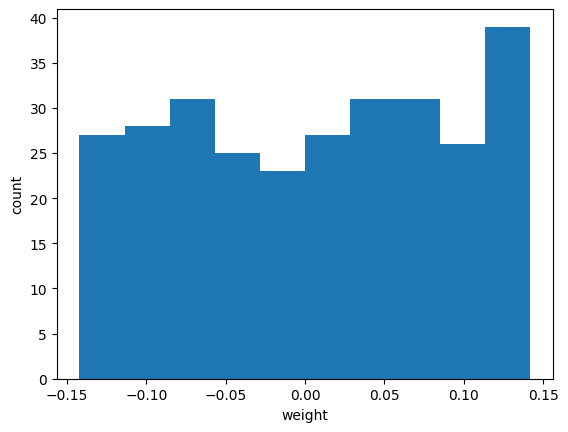

In [62]:
# 초기 훈련 데이터 (가공 전)의 히스토그램.
# 기존보다 정규분포를 따르지 못한다.
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

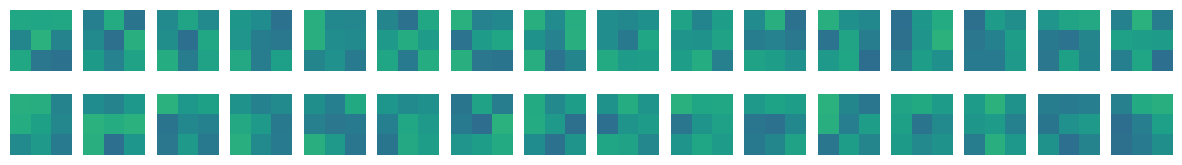

In [63]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

# 가공 후 이미지와 가공 전 이미지가 다른것을 볼 수 있음.

## 함수형 API

In [64]:
#  함수형 API 는 아래와 같다.
#  요즘은 이렇게 객체형 호출이 더 자주 쓰임..
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

#은닉층
hidden = dense1(inputs)
#출력층
outputs = dense2(hidden)
#  입력과 출력을 지정해서 모델을 생성.

func_model = keras.Model(inputs, outputs)

#  입력과 출력 모두 여러개일 경우 유용함.

In [65]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


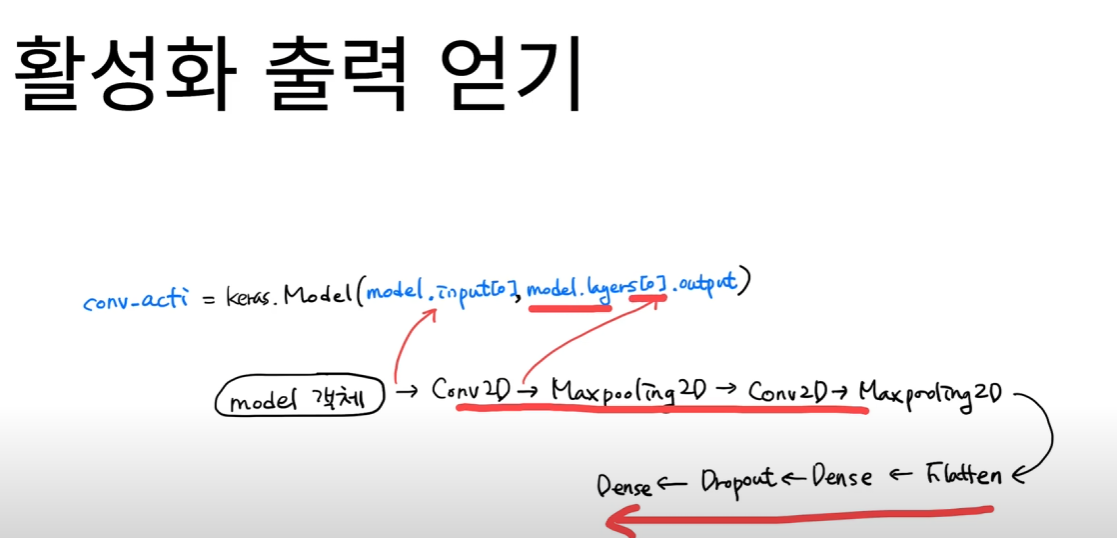

얻고싶은 주소를 model.XXX [ ] 에 넣어서 얻을 수 있다.

In [66]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

## 특성 맵 시각화

In [67]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

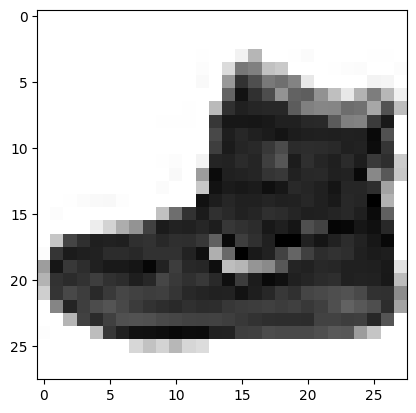

In [68]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

# 첫번째 CONV_2D의 이미지를 시각화 한것임..

In [69]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(ankle_boot)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


In [70]:
print(feature_maps.shape)

(1, 28, 28, 32)


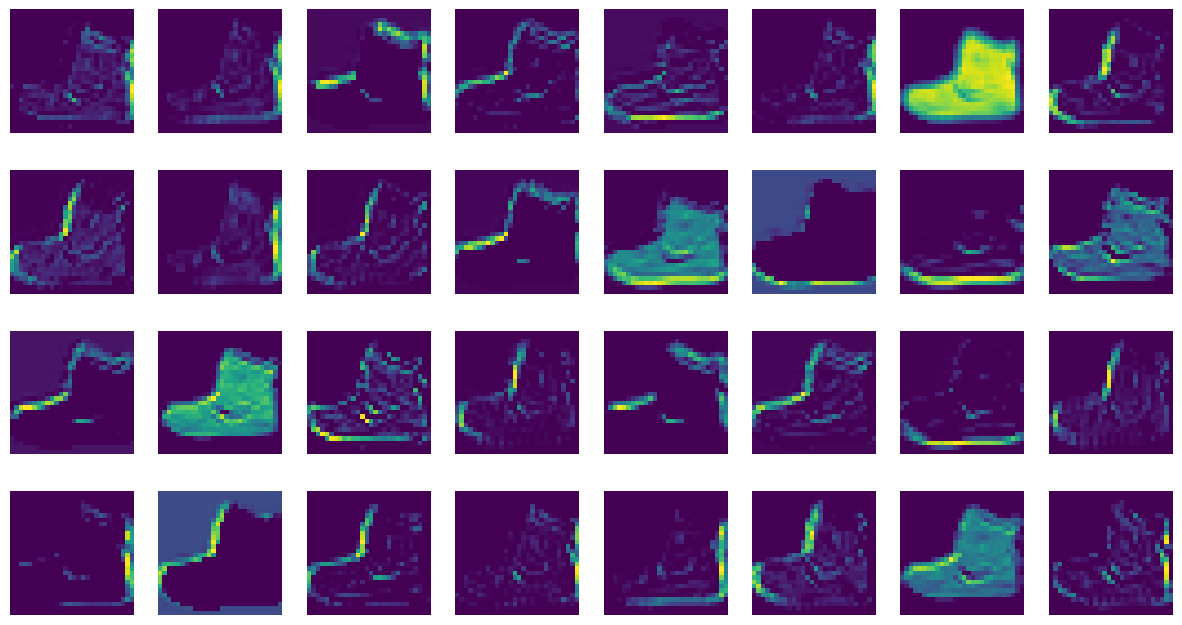

In [71]:
# 32개의 특성맵을 그림.

# 각 필터마다 감지하는 부분이 밝음으로 다름을 알 수 있다.
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [72]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [73]:
feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [74]:
print(feature_maps.shape)

(1, 14, 14, 64)


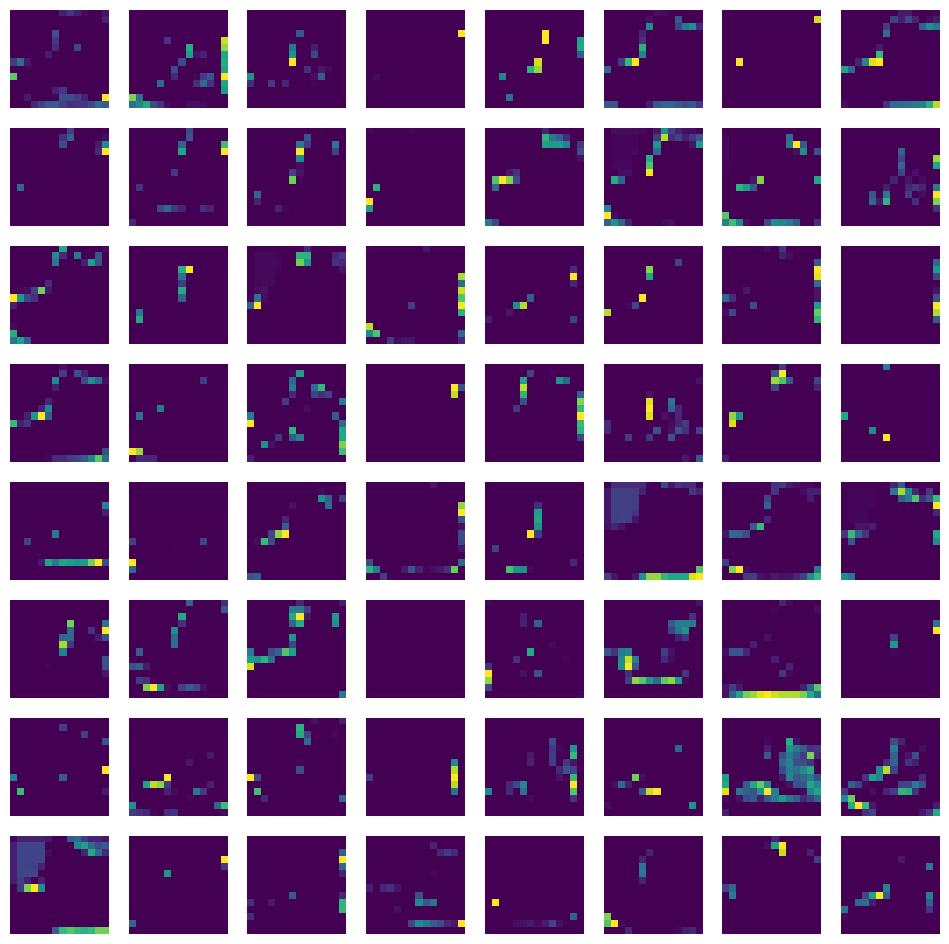

In [75]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()